___
# Modelos probabilísticos contínuos - Alguns resultados da aula
___

## Aula 13

**Preparo Prévio:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Modelo Normal (pág. 197 a 203).

**Hoje:**
1.	Descrever as propriedades do modelo normal quanto aos resultados teóricos.
2. Utilizar modelos normais para resolução de problemas seja com ou sem uso do Python.
3. Contrastar resultados teóricos e empíricos.


**Próxima aula:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Seção 5.1 (pág. 137) e Seção 5.2 (pág. 146).
___

___
## <font color='blue'>Propriedades da distribuição Normal</font>

> **DISTRIBUIÇÃO NORMAL - TEORIA:**

> Seja $X$ uma variável aleatória contínua com média igual a $\mu$ e variância igual a $\sigma^2$. Se essa variável é modelada por uma distribuição normal, dizemos que $X$~$N(\mu,\sigma^2)$. 

> A função densidade de probabilidade - fdp (ou pdf, em inglês) de uma distribuição Normal é dada por:
$f(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$, 
sendo $x\in\mathbb{R}$, $\mu\in\mathbb{R}$ e $\sigma^2>0$.

> Alterando possíveis valores de $x$ em torno de $\mu$ e calculando, para cada $x$, o respectivo valor de $f(x)$, é possível visualizar graficamente a famosa distribuição em forma de sino.


> **DISTRIBUIÇÃO NORMAL - PYTHON:** <sup> [https://en.wikipedia.org/wiki/SciPy]

> Algumas funções úteis para desenvolver seu código: <sup> [http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html]

> Com a linha de comando `from scipy import stats` e assumindo que $E(X)=\mu$ e $Var(X)=\sigma^2$, alguns dos exemplos abaixo úteis para trabalhar com a distribuição normal no Python:
* $f(x)$: `stats.norm.pdf(x, loc=mu, scale=sigma)`
* $P(X\leq x)$: `stats.norm.cdf(x, loc=mu, scale=sigma)`
* $x$ tal que $P(X\leq x)=p$: `stats.norm.ppf(p, loc=mu, scale=sigma)`




In [1]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from numpy import mean, var

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Usuario\Anaconda3\Scripts


___
### <font color='green'>Gráfico distribuição Normal alterando valores para a média $\mu$  e/ou  variância $\sigma^2$ </font>


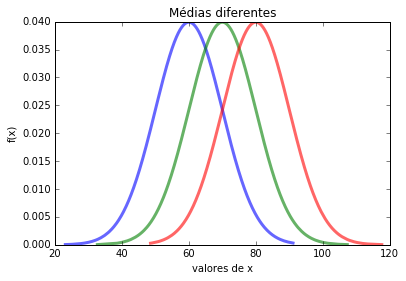

In [2]:
#Distribuição Normal 
#Média muda 
#Desvio padrão igual
sigma = 10
lista = (60, 70, 80)
for mu in lista:
    x=sorted(stats.norm.rvs(size=4000, loc=mu, scale=sigma))
    plt.plot(x, stats.norm.pdf(x, loc=mu, scale=sigma), lw=3, alpha=0.6)
    
plt.title('Médias diferentes')
plt.xlabel('valores de x')
plt.ylabel('f(x)')

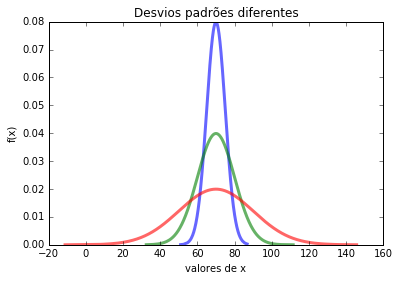

In [3]:
#Distribuição Normal 
#Média igual
#Desvio padrão muda
mu = 70
lista = (5, 10, 20)
for sigma in lista:
    x=sorted(stats.norm.rvs(size=4000, loc=mu, scale=sigma))
    plt.plot(x, stats.norm.pdf(x, loc=mu, scale=sigma), lw=3, alpha=0.6)
    
plt.title('Desvios padrões diferentes')
plt.xlabel('valores de x')
plt.ylabel('f(x)')

___
### <font color='green'> Propriedades da distribuição normal </font>

In [4]:
#Probabilidade de X estar entre mu mais ou menos c*sigma
#Pode alterar valores de mu (média de X) e de sigma (desvio padrao de X)!
#Alterações de mu e sigma NÃO alteram as probabilidades abaixo, pois trata-se de propriedade !!
mu = 70
sigma = 10
print('Probabilidade de X acontecere considerando UM desvio padrão em torno da média:', 
      stats.norm.cdf(mu+sigma, loc=mu, scale=sigma)-stats.norm.cdf(mu-sigma, loc=mu, scale=sigma))

print('Probabilidade de X acontecere considerando DOIS desvio padrão em torno da média:', 
      stats.norm.cdf(mu+2*sigma, loc=mu, scale=sigma)-stats.norm.cdf(mu-2*sigma, loc=mu, scale=sigma))

print('Probabilidade de X acontecere considerando TRÊS desvio padrão em torno da média:', 
      stats.norm.cdf(mu+3*sigma, loc=mu, scale=sigma)-stats.norm.cdf(mu-3*sigma, loc=mu, scale=sigma))

Probabilidade de X acontecere considerando UM desvio padrão em torno da média: 0.682689492137
Probabilidade de X acontecere considerando DOIS desvio padrão em torno da média: 0.954499736104
Probabilidade de X acontecere considerando TRÊS desvio padrão em torno da média: 0.997300203937


___
## <font color='blue'>Exemplo 1 da Aula 13 </font>

In [5]:
#Simulação de valores a partir de uma distribuição Normal com média 15 e desvio padrão 6 apenas 
#Simulação de dados para visualizar histograma com densidade da normal
mu = 15
sigma = 6
x=sorted(stats.norm.rvs(size=10000, loc=mu, scale=sigma))

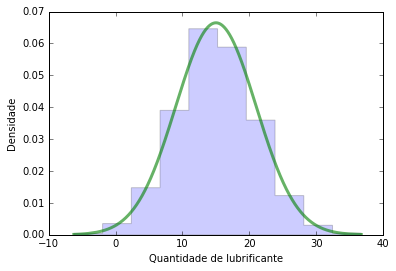

In [6]:
#Distribuição Normal com média 15 e desvio padrão 6
plt.hist(x, normed=1, histtype='stepfilled', alpha=0.2)
plt.plot(x, stats.norm.pdf(x, loc=mu, scale=sigma), lw=3, alpha=0.6)
plt.title('')
plt.xlabel('Quantidade de lubrificante')
plt.ylabel('Densidade')

In [7]:
#Conta para padronizar dados
z=(x-mean(x))/(var(x)**(1/2))


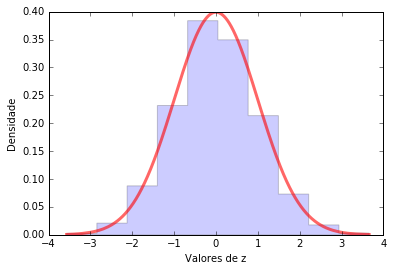

In [8]:
#Distribuição Normal Padrão
plt.hist(z, normed=1, histtype='stepfilled', alpha=0.2)
plt.plot(z, stats.norm.pdf(z, loc=0, scale=1), 'r', lw=3, alpha=0.6)
plt.title('')
plt.xlabel('Valores de z')
plt.ylabel('Densidade')

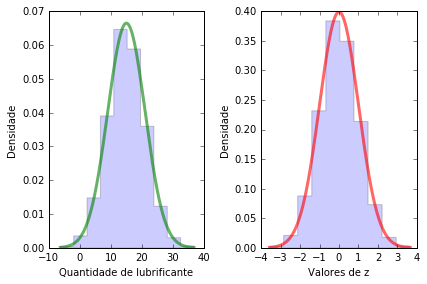

In [9]:
f, (ax1,ax2) = plt.subplots(1,2)

ax1.hist(x, normed=1, histtype='stepfilled', alpha=0.2)
ax1.plot(x, stats.norm.pdf(x, loc=mu, scale=sigma), lw=3, alpha=0.6)
ax1.set_xlabel('Quantidade de lubrificante')
ax1.set_ylabel('Densidade')

ax2.hist(z, normed=1, histtype='stepfilled', alpha=0.2)
ax2.plot(z, stats.norm.pdf(z, loc=0, scale=1), 'r', lw=3, alpha=0.6)
ax2.set_xlabel('Valores de z')
ax2.set_ylabel('Densidade')

plt.tight_layout(1)

In [10]:
#Probabilidade do Exemplo 1 a partir da variável X
#P(X > 20)=
1 - stats.norm.cdf(20, loc=mu, scale=sigma)

0.20232838096364314

In [11]:
#Probabilidade do Exemplo 1 a partir da variável Z padronizada
#P(Z > (20-mu)/sigma)
1 - stats.norm.cdf((20-mu)/sigma, loc=0, scale=1)

0.20232838096364314

In [12]:
#Qual x para P(X > x ) = 5%?
# A partir da distribuição de X
stats.norm.ppf(0.95, loc=mu, scale=sigma)

24.869121761708833

In [13]:
#Qual x para P(X > x ) = 5%?
# A partir da distribuição de Z - despadronização
mu+stats.norm.ppf(0.95, loc=0, scale=1)*sigma

24.869121761708833

___
## <font color='blue'>Exemplo 2 da Aula 13 </font>

In [14]:
# Valores dos parâmetros de X
mu = 100
sigma = 35

In [15]:
#Probabilidade do Exemplo 2 a partir da variável X
#P(X > 90)=
1 - stats.norm.cdf(90, loc=mu, scale=sigma)

0.61245151890200766

In [16]:
#Probabilidade do Exemplo 1 a partir da variável Z padronizada
#P(Z > (90-mu)/sigma)
1 - stats.norm.cdf((90-mu)/sigma, loc=0, scale=1)

0.61245151890200766

In [17]:
#Qual x para P(X > x ) = 15%?
# A partir da distribuição de X
stats.norm.ppf(0.85, loc=mu, scale=sigma)

136.27516863228266

In [18]:
#Qual x para P(X > x ) = 15%?
# A partir da distribuição de Z - despadronização
mu+stats.norm.ppf(0.85, loc=0, scale=1)*sigma

136.27516863228266

___
## <font color='blue'>Exercício 1 da Aula 13 </font>

In [19]:
stats.norm.cdf(115, loc=90, scale=10)

0.99379033467422384

In [20]:
(stats.norm.cdf(100, loc=90, scale=10)-stats.norm.cdf(80, loc=90, scale=10))/stats.norm.cdf(100, loc=90, scale=10)

0.81142658265493972

In [21]:
stats.norm.ppf(0.995, loc=90, scale=10)-90

25.758293035489004

In [22]:
stats.norm.ppf(0.975, loc=90, scale=10)

109.59963984540053

In [23]:
stats.norm.ppf(0.05, loc=90, scale=10)

73.551463730485267

___
## <font color='blue'>Exemplo 3 da Aula 13 </font>

In [24]:
stats.norm.ppf(0.70, loc=6.5, scale=1.6)

7.3390408203328654

In [25]:
stats.norm.ppf(0.20, loc=6.5, scale=1.6)

5.1534060262833368

In [26]:
(1-stats.norm.cdf(7.0, loc=6.5, scale=1.6))*50

18.866514076492148